TensorFlow version: 1.12.0

x_train data shape: (60000, 28, 28) y_train data shape: (60000,)

image shown is indexed as: 8


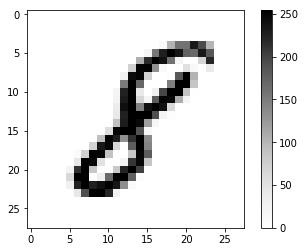

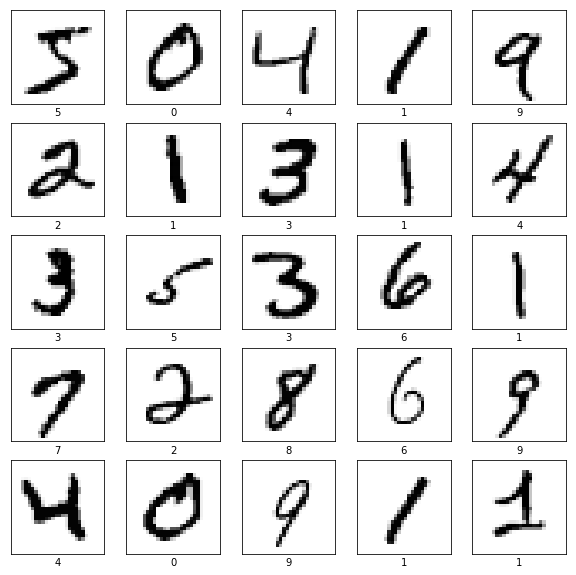

In [19]:
# import the library and the dataset
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
# importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import model_from_json # export the model to JSON format


(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()


# matplotlib inline to show the image. without this, image won't show in line. And one cannot put even the comment on the same line
%matplotlib inline 

# print out the version of TensorFlow
print("TensorFlow version:", tf.__version__)

# print out the dataset shape of x_train
print("\nx_train data shape:", x_train.shape, "y_train data shape:", y_train.shape)

# test the data load with the random index
image_index = 7777 
print("\nimage shown is indexed as:", y_train[image_index])
plt.imshow(x_train[image_index], cmap="Greys")
plt.colorbar()
plt.grid(False)
plt.show()

# display the data set to test the data aginst the label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='Greys')
    plt.xlabel(y_train[i])
plt.show()


In [20]:
# reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# making sure that the values are float so that we can get decimal after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train reshaped:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train reshaped: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [21]:
# Building the empty Convolutional Neural Network


# creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) # Final Dense layer must have 10 neurons since we have 10 number classes

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compiling and Fitting the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.2051 - acc: 0.9389
Epoch 2/10
60000/60000 [==============================] - 23s 391us/step - loss: 0.0805 - acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0549 - acc: 0.9831
Epoch 4/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0414 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.0334 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0269 - acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0242 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 23s 383us/step - loss: 0.0220 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.0196 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 26s 426us/step - loss: 

In [23]:
# evaluate the result
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 163us/step


[0.05953544670143019, 0.9856]

In [24]:
# function that visualize the prediction result

def plot_image(i, prediction_array, true_label, img):
    
    prediction_array, true_label, img = prediction_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.reshape(28,28), cmap="Greys") # reshape the image data back to 28x28
    
    predicted = np.argmax(prediction_array)
    
    if predicted == true_label:
        color = 'g'
    else:
        color = 'r'
        
    plt.xlabel("{} {:2.0f}% ({})".format(predicted, 100*np.max(prediction_array), true_label), color=color)
    

def plot_value_array(i, prediction_array, true_label):
    
    prediction_array, true_label = prediction_array[i], true_label[i]
    
    plt.grid(False)
    plt.xticks(range(10), range(10))
    plt.yticks([])
    barplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0,1])
    predicted = np.argmax(prediction_array)
    
    barplot[predicted].set_color('red')
    barplot[true_label].set_color('green')


In [25]:
# predict the model with the test data set
pred = model.predict(x_test)

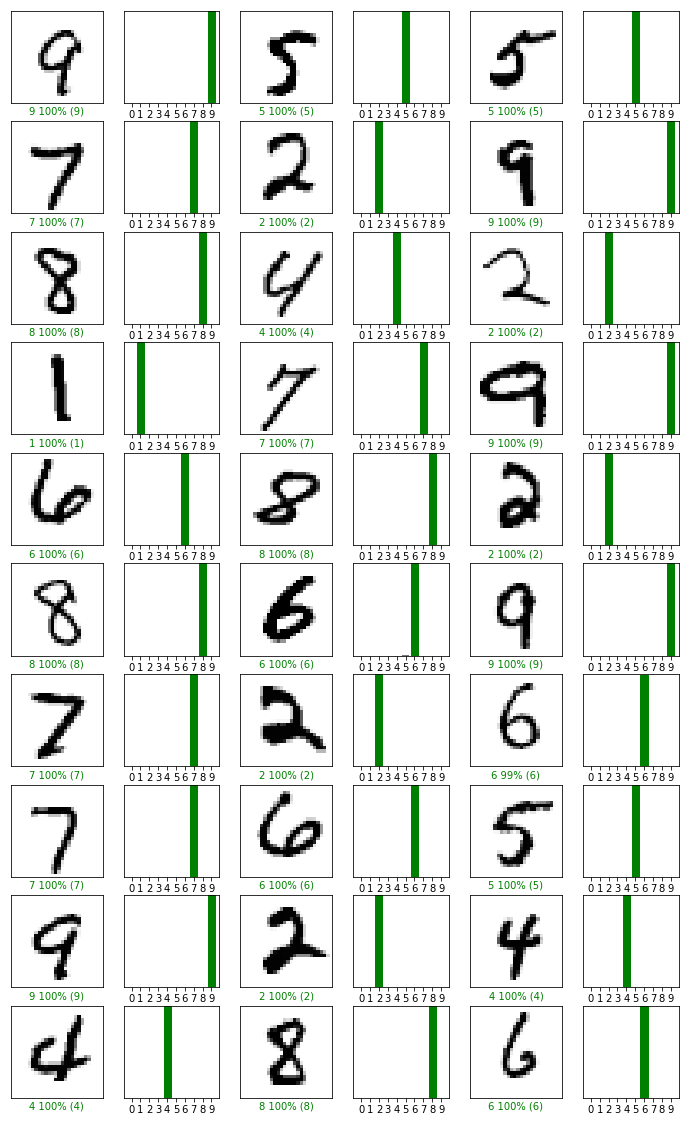

In [26]:
# create the palate of images with the prediction
# label shown in green if the prediction is correct. Otherwise, it'll be in red
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    img_no = random.randint(1,10000)
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(img_no, pred, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(img_no, pred, y_test)

In [27]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


# loading sequence below. no need to run here
# # load weights into new model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")



Saved model to disk
Loaded model from disk
